In [3]:
import pandas as pd

# 데이터 로드
df = pd.read_csv('../data/Clean_White_data.csv')

# 데이터의 첫 몇 행을 확인하여 내용 확인
print(df.head())

#데이터를 로드해서 데이터프레임으로 바꾸기


   index                    wine_name  wine_rating  wine_reviews wine_price  \
0      1  Morning Fog Chardonnay 2003          3.9         29592     28,335   
1      2                      Moscato          3.8         19902     18,751   
2      3          Pouilly-Fuissé 2002          4.1         19678    964,546   
3      4          Pouilly-Fuissé 1993          4.1         19678    649,214   
4      5          Pouilly-Fuissé 2000          4.1         19678    958,358   

                                           wine_link   wine_country  \
0  https://www.vivino.com/wente-vineyards-morning...  United States   
1  https://www.vivino.com/barefoot-moscato/w/1201...  United States   
2  https://www.vivino.com/louis-jadot-pouilly-fui...         France   
3  https://www.vivino.com/louis-jadot-pouilly-fui...         France   
4  https://www.vivino.com/louis-jadot-pouilly-fui...         France   

      wine_region      wine_winery   wine_type  wine_grape  \
0   Central Coast  Wente Vineyards  

In [4]:
#필요 컬럼 셀렉트하기
# 필요 컬럼 선택
df = df[['body', 'texture', 'sweetness', 'flavor1', 'flavor2', 'flavor3', 'wine_rating']]


In [5]:
#원핫인코딩해서 변수로 변환하기
# 범주형 변수 원-핫 인코딩
df_encoded = pd.get_dummies(df, columns=['flavor1', 'flavor2', 'flavor3'])

# 인코딩된 데이터의 첫 몇 행을 확인
print(df_encoded.head())


      body   texture  sweetness  wine_rating  flavor1_citrus  flavor1_earthy  \
0  87.5000  39.47760    51.6486          3.9           False           False   
1  48.9861  54.00280    51.9183          3.8           False           False   
2  49.3777   8.25727    49.0633          4.1           False           False   
3  49.3777   8.25727    49.0633          4.1           False           False   
4  49.3777   8.25727    49.0633          4.1           False           False   

   flavor1_oaky  flavor1_red fruit  flavor1_tree fruit  flavor1_tropical  ...  \
0          True              False               False             False  ...   
1         False              False                True             False  ...   
2          True              False               False             False  ...   
3          True              False               False             False  ...   
4          True              False               False             False  ...   

   flavor3_citrus  flavor3_dried

In [6]:
#단계 --- 데이터 전처리 하기
# 입력 변수와 출력 변수 분리
X = df_encoded.drop('wine_rating', axis=1)
y = df_encoded['wine_rating']


In [7]:
#훈련세트와 테스트 세트로 분할
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [8]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [9]:
#3단계 - 신경망 모델정의
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 신경망 모델 구축
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\KOSMO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#4단계 모델훈련
# 모델 훈련
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 11.7520 - val_loss: 2.8731
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0271 - val_loss: 0.9882
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5680 - val_loss: 0.4989
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2354 - val_loss: 0.4051
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1520 - val_loss: 0.3714
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1307 - val_loss: 0.3653
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1119 - val_loss: 0.3378
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0905 - val_loss: 0.3264
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0938 - val_loss: 0.3219
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0713 - val_loss: 0.3161
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0681 - val_loss: 0.2961
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.

In [11]:
#5단계 평가및 예측
from sklearn.metrics import mean_squared_error, r2_score

# 예측
y_pred = model.predict(X_test_scaled).flatten()

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Mean Squared Error: 0.16
R^2 Score: -0.77


In [12]:
#새로운 데이터 예측
import numpy as np

# 예시 데이터 (원-핫 인코딩 필요)
example_data = np.array([[67.17, 60.86, 9.57, 0, 1, 0]])  # 실제 원-핫 인코딩 값이 필요함

# 예시 데이터 표준화
example_data_scaled = scaler.transform(example_data)

# 예측
predicted_score = model.predict(example_data_scaled).flatten()
print(f'Predicted Score for example data: {predicted_score[0]:.2f}')


c:\Users\KOSMO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but StandardScaler is expecting 33 features as input.

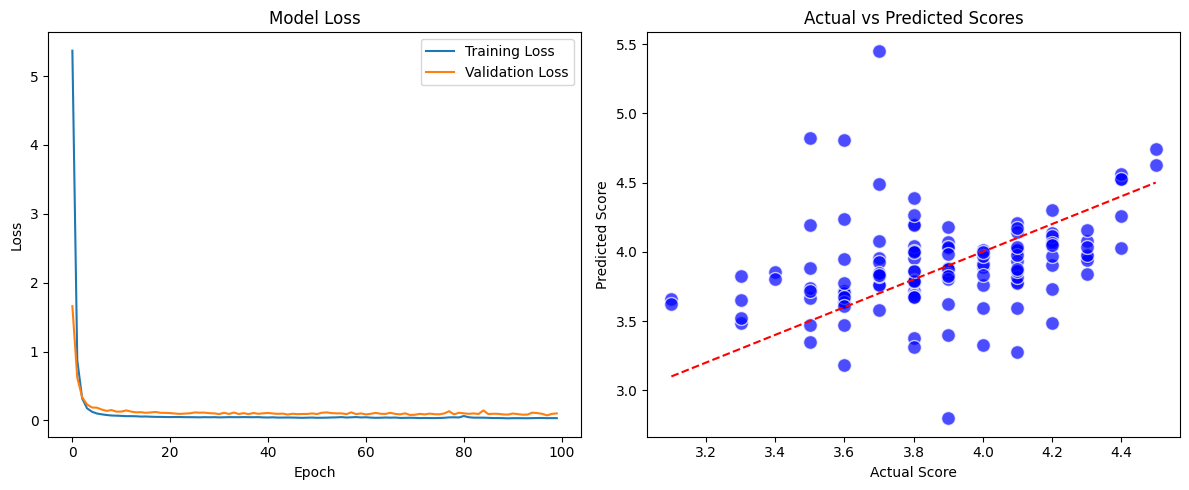

In [ ]:
#6단계 결과시각화
import matplotlib.pyplot as plt

# 학습 과정 시각화
plt.figure(figsize=(12, 5))

# 손실 값 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# 실제 vs 예측 그래프
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, edgecolors='w', s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Scores')

plt.tight_layout()
plt.show()


Epoch 1/100


c:\Users\KOSMO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14.3811 - val_loss: 4.1501
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9608 - val_loss: 0.9844
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6324 - val_loss: 0.2815
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2120 - val_loss: 0.2005
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1226 - val_loss: 0.1558
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1082 - val_loss: 0.1420
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0845 - val_loss: 0.1338
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0830 - val_loss: 0.1293
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0802 - val_loss: 0.1240
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0757 - val_loss: 0.1173
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0721 - val_loss: 0.1170
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0680 - val_l

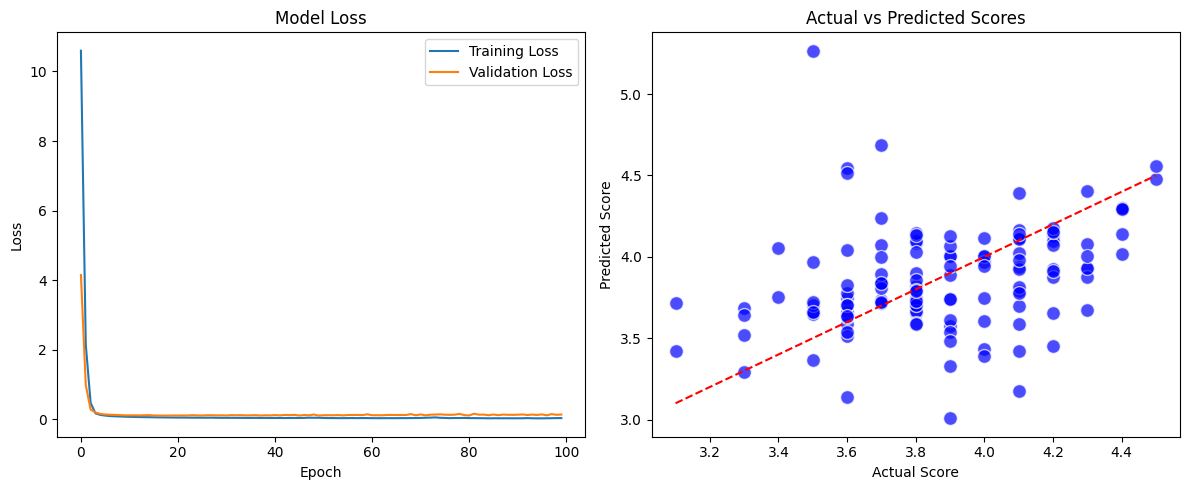

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('Clean_White_data.csv')

# 2. 필요 컬럼 선택
df = df[['body', 'texture', 'sweetness', 'flavor1', 'flavor2', 'flavor3', 'wine_rating']]

# 3. 범주형 변수 원-핫 인코딩
df_encoded = pd.get_dummies(df, columns=['flavor1', 'flavor2', 'flavor3'])

# 4. 입력 변수와 출력 변수 분리
X = df_encoded.drop('wine_rating', axis=1)
y = df_encoded['wine_rating']

# 5. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 6. 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. 신경망 모델 구축
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 8. 모델 훈련
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

# 9. 모델 평가
y_pred = model.predict(X_test_scaled).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# 10. 새로운 데이터 예측
# 새로운 데이터 예시 (각 flavor 값은 원-핫 인코딩 후의 값이어야 함)
new_data = pd.DataFrame({
    'body': [67.17],
    'texture': [60.86],
    'sweetness': [9.57],
    'flavor1_black fruit': [1],
    'flavor1_oaky': [0],
    'flavor2_black fruit': [0],
    'flavor2_oaky': [0],
    'flavor3_black fruit': [0],
    'flavor3_oaky': [0]
})

# 원-핫 인코딩과 스케일링을 동일하게 수행
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)
new_data_scaled = scaler.transform(new_data_encoded)

# 예측
predicted_score = model.predict(new_data_scaled).flatten()
print(f'Predicted Score for example data: {predicted_score[0]:.2f}')

# 11. 학습 과정 시각화
plt.figure(figsize=(12, 5))

# 손실 값 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# 실제 vs 예측 그래프
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, edgecolors='w', s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Scores')

plt.tight_layout()
plt.show()
